# **Data Exploration**

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Models import
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score,precision_score,RocCurveDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#import imputer:
from sklearn.impute import KNNImputer
#score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier

In [3]:
#Reading Dataset
startup= pd.read_csv("startup data1.csv",converters={'status': lambda x: int(x == 'acquired')},parse_dates=['founded_at','first_funding_at','last_funding_at'])

#Changeing the label column name from "status" to "is_acquired" , for binary classification
startup.rename(columns={'status':'is_acquired'}, inplace=True)
startup['is_acquired'].astype(int)
startup.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [4]:
startup.dtypes

Unnamed: 0                           int64
state_code                          object
latitude                           float64
longitude                          float64
zip_code                            object
id                                  object
city                                object
Unnamed: 6                          object
name                                object
labels                               int64
founded_at                  datetime64[ns]
closed_at                           object
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
state_code.1                        object
is_CA      

In [5]:
#Checking missing/null values
startup.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
Unnamed: 0                    0
is_biotech                    0
is_software                   0
is_web                        0
is_mobile                     0
dtype: int64

In [6]:
print("Percentage of missing values in 'closed_at' column:{:.2f}%". format((startup.closed_at.isnull().sum())/len(startup)*100))
print("Percentage of missing values in 'Unnamed: 6' column:{:.2f}%". format((startup["Unnamed: 6"].isnull().sum())/len(startup)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  :{:.2f}%". format((startup.age_last_milestone_year.isnull().sum())/len(startup)*100))
print("percentage of missing values in 'age_first_milestone_year' column :{:.2f}%". format((startup.age_first_milestone_year.isnull().sum())/len(startup)*100))

Percentage of missing values in 'closed_at' column:63.71%
Percentage of missing values in 'Unnamed: 6' column:53.41%
Percentage of missing values in 'age_last_milestone_year' column  :16.47%
percentage of missing values in 'age_first_milestone_year' column :16.47%


# **Data Preprocessing**

In [8]:
startup['closed_at'] = pd.to_datetime(startup['closed_at'])
startup['founded_at'] = pd.to_datetime(startup['founded_at'])
#convert to datetime data

startup['last_date']=startup['closed_at'] #copy data
startup['last_date']=startup['last_date'].fillna('2013-12-31')
startup['last_date']=pd.to_datetime(startup['last_date'])

startup["founded_at"] = pd.to_datetime(startup["founded_at"])

startup["age"] = (startup["last_date"]-startup["founded_at"])
startup["age"]=round(startup.age/np.timedelta64(1,'Y'))

data_grp_3=startup[startup['is_acquired']==1].groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_3.columns=['age','total_succes']

data_grp_4=startup.groupby(['age']).agg({'is_acquired':'count'}).reset_index()
data_grp_4.columns=['age','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                            on='age')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3

,age,total_succes,total,succes_rate
0,1.0,1,14,7.14
1,2.0,9,49,18.37
2,3.0,20,62,32.26
3,4.0,45,83,54.22
4,5.0,54,93,58.06
5,6.0,64,92,69.57
6,7.0,65,98,66.33
7,8.0,59,77,76.62
8,9.0,68,87,78.16
9,10.0,44,56,78.57


In [9]:
#Dropping the following columns:
#After cheacking both columns values, we got to know that both column show the same data.
#labels: The labels column values and is_acquired column values are same.
pd.isnull(startup["labels"]==startup["is_acquired"]).sum()

0

In [10]:
#Dropping some columns which are not useful.-unnamed0,unnamed 6,labels,closed_at
#Unnamed: 6 has 493 missimg data as we dont have info about this cloumn. 
#Unnamed:0 is unknown.
#closed_at: It has arnd 63% null values

startup.drop(["Unnamed: 6"],axis=1, inplace=True)
startup.drop(["Unnamed: 0"], axis=1, inplace=True)
startup.drop(["labels"],axis=1, inplace=True)
startup.drop(["closed_at"], axis=1, inplace=True)

#similar as state_code, redundant data
startup.drop(["state_code.1"], axis=1, inplace=True)

In [11]:
startup.shape

(923, 46)

In [12]:
startup.isnull().sum().sort_values(ascending=False).head(8)

age_first_milestone_year    152
age_last_milestone_year     152
is_software                   0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
dtype: int64

In [13]:
#Filling missing values using KNN imputer
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
def imputing_numeric_missing_values(startup,n_neighbors=10):
    numerical_column_names = startup.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(startup[numerical_column_names])
    
    startup[numerical_column_names]=pd.DataFrame(knn_dataset)
    return startup

startup=imputing_numeric_missing_values(startup)

numerical_df_3=startup.select_dtypes(numerics)

# Check for Null values
print(startup.isnull().sum())

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_otherca

In [14]:
# Convert them to numerics by adding and making new features:
startup['months_between_first_and_last_funding'] = ((startup.last_funding_at - startup.first_funding_at)/np.timedelta64(1, 'M'))
startup['months_between_foundation_and_first_funding']=((startup.first_funding_at - startup.founded_at)/np.timedelta64(1, 'M'))
startup['months_between_foundation_and_first_funding']

0       26.973860
1       61.471488
2       12.386291
3       37.553133
4        0.000000
          ...    
918      6.209573
919     86.966878
920    101.882996
921      9.100803
922     37.421713
Name: months_between_foundation_and_first_funding, Length: 923, dtype: float64

In [15]:
#creating new column Founded year
startup['founded_year'] = pd.DatetimeIndex(startup['founded_at']).year
#delete unnecessary data as it is converted to new columns
startup.drop(["last_funding_at"],axis=1, inplace=True)
startup.drop(["first_funding_at"], axis=1, inplace=True)
startup.drop(["founded_at"], axis=1, inplace=True)

In [16]:
#convert object_id to numeric:
startup['object_id'] = startup['object_id'].str.replace("c:", '').astype(int)
startup['id'] = startup['id'].str.replace("c:", '').astype(int)

startup

,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,last_date,age,months_between_first_and_last_funding,months_between_foundation_and_first_funding,founded_year
0,CA,42.358880,-71.056820,92101,6669,San Diego,Bandsintown,2.2493,3.0027,4.6685,...,0.0,0.0,1.0000,0.0,1.0,2013-12-31,7.0,9.035093,26.973860,2007
1,CA,37.238916,-121.973718,95032,16283,Los Gatos,TriCipher,5.1260,9.9973,7.0055,...,1.0,1.0,4.7500,1.0,1.0,2013-12-31,14.0,58.415984,61.471488,2000
2,CA,32.901049,-117.192656,92121,65620,San Diego,Plixi,1.0329,1.0329,1.4575,...,0.0,0.0,4.0000,1.0,1.0,2013-12-31,5.0,0.000000,12.386291,2009
3,CA,37.320309,-122.050040,95014,42668,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,...,1.0,1.0,3.3333,1.0,1.0,2013-12-31,12.0,26.185343,37.553133,2002
4,CA,37.779281,-122.419236,94105,65806,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,...,0.0,0.0,1.0000,1.0,0.0,2012-10-01,2.0,20.008624,0.000000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,21343,San Francisco,CoTweet,0.5178,0.5178,0.5808,...,0.0,0.0,6.0000,1.0,1.0,2013-12-31,5.0,0.000000,6.209573,2009
919,MA,42.504817,-71.195611,1803,41747,Burlington,Reef Point Systems,7.2521,9.2274,6.0027,...,0.0,0.0,2.6667,1.0,0.0,2008-06-25,10.0,23.688371,86.966878,1998
920,CA,37.408261,-122.015920,94089,31549,Sunnyvale,Paracor Medical,8.4959,8.4959,9.0055,...,0.0,1.0,8.0000,1.0,0.0,2012-06-17,13.0,0.000000,101.882996,1999
921,CA,37.556732,-122.288378,94404,33198,San Francisco,Causata,0.7589,2.8329,0.7589,...,0.0,0.0,1.0000,1.0,1.0,2013-12-31,5.0,24.871147,9.100803,2009


# **Exploratory Data Analysis**

In [ ]:
describeNumCat = startup.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
city,923,221,San Francisco,128
name,923,922,Redwood Systems,2
category_code,923,35,software,153


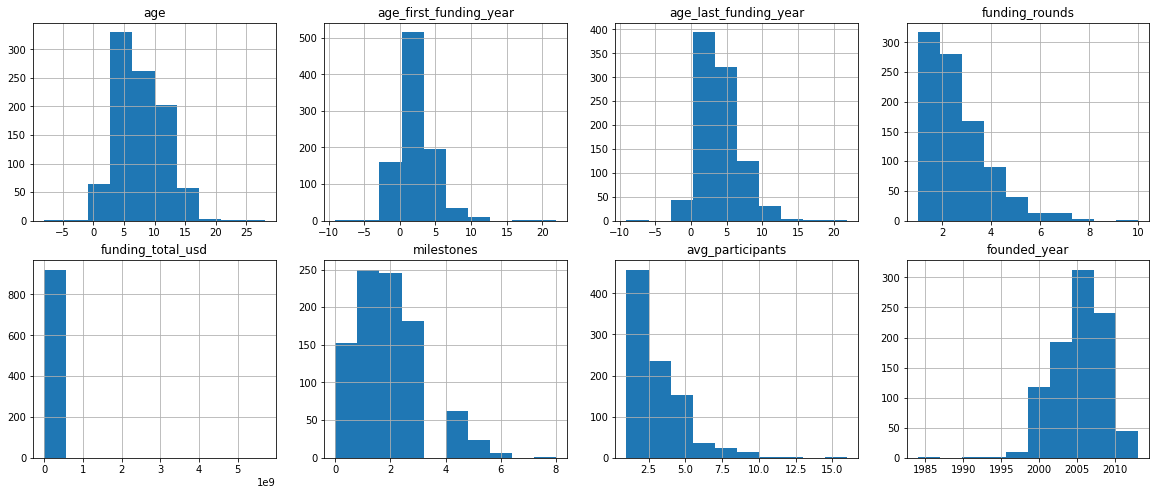

In [ ]:
featuresNum = ['age','age_first_funding_year','age_last_funding_year','funding_rounds','funding_total_usd','milestones','avg_participants','founded_year']

plt.figure(figsize=(20,8))

for i,feature in enumerate(featuresNum):
    plt.subplot(2,4,i+1)
    startup[feature].hist()
    plt.title(feature)

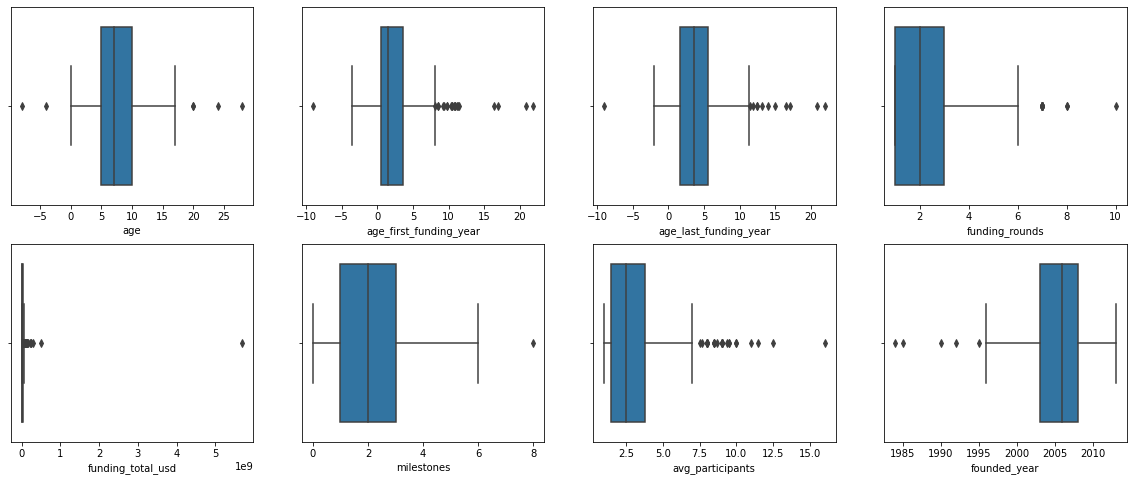

In [ ]:
plt.figure(figsize=(20,8))
for i,feature in enumerate(featuresNum):
    plt.subplot(2,4,i+1)
    sns.boxplot(startup[feature])

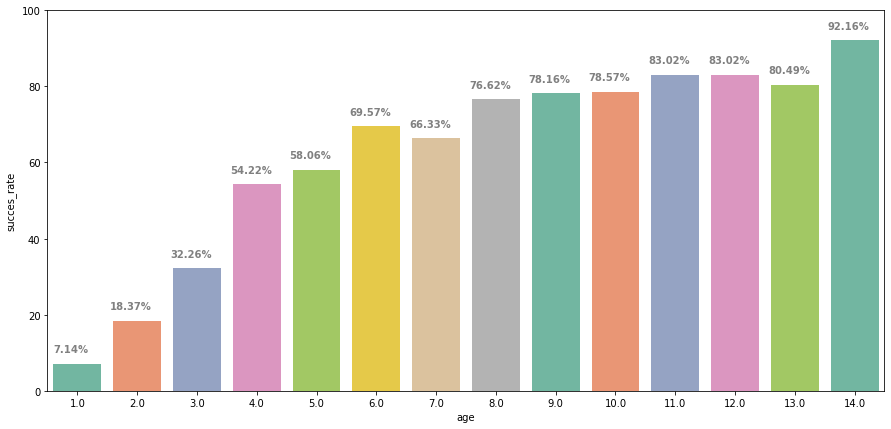

In [ ]:
#creating a plot between success rate and age of startups
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'age',y='succes_rate',data=data_grp_3,ax=ax, 
               palette=sns.color_palette("Set2", n_colors=13, desat=1))

x = np.arange(len(data_grp_3))
y = data_grp_3['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%',horizontalalignment='center', fontsize = 10, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.tight_layout
plt.autoscale(False)

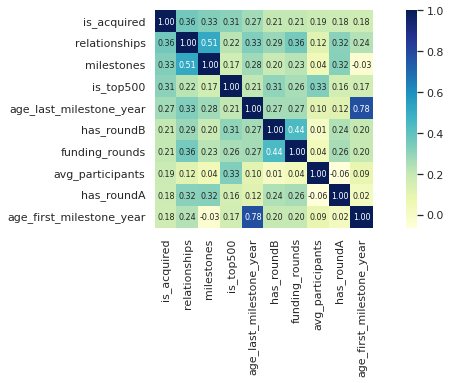

In [ ]:
#correlation matrix (zoomed heatmap style)

#number of variables for heatmap
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','is_acquired']
cols = startup[features].corr().nlargest(10,'is_acquired')['is_acquired'].index
cm = np.corrcoef(startup[cols].values.T) 
sns.set(font_scale=1)

plt.figure(figsize=(12, 4))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values )
plt.show()

Text(0.5, 1.0, 'Age vs Success Rate')

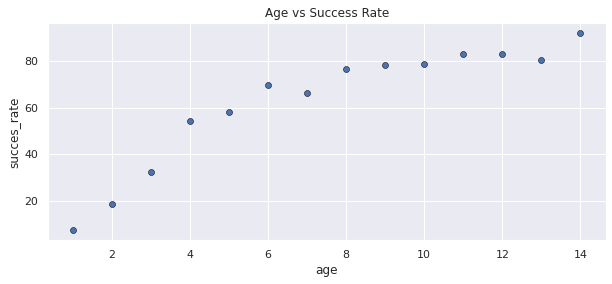

In [ ]:
#plotting scatter plot between age and success rate
fig, ax = plt.subplots(figsize=(10, 4))
plt.scatter(x=data_grp_3['age'], y=data_grp_3['succes_rate'], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="age", ylabel="succes_rate")

plt.title('Age vs Success Rate')

We see that 'age' and 'success_rate' are strongly positively correlated where as one increases, the other also increases — they are growing in a linear manner.

[Text(0, 0.5, 'No. of Startups'), Text(0.5, 0, 'Founding Year')]

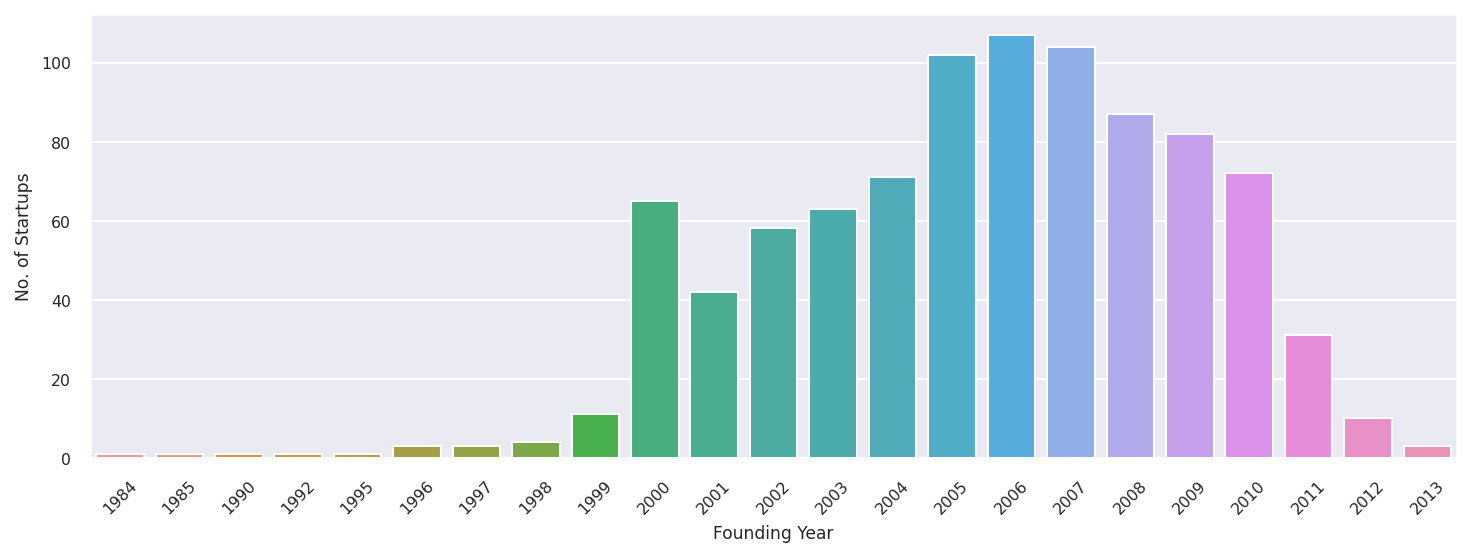

In [ ]:
#plotting bar plot between Number of startup and founding year
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147}, font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x="founded_year", data=startup, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel="Founding Year", ylabel="No. of Startups")

Most number of startups were found between 2000 to 2010

In [ ]:
df_acquired = startup[(startup["is_acquired"] == True)]
df_acquired.shape

(597, 46)

Text(0.5, 1.0, 'Startup Acquired')

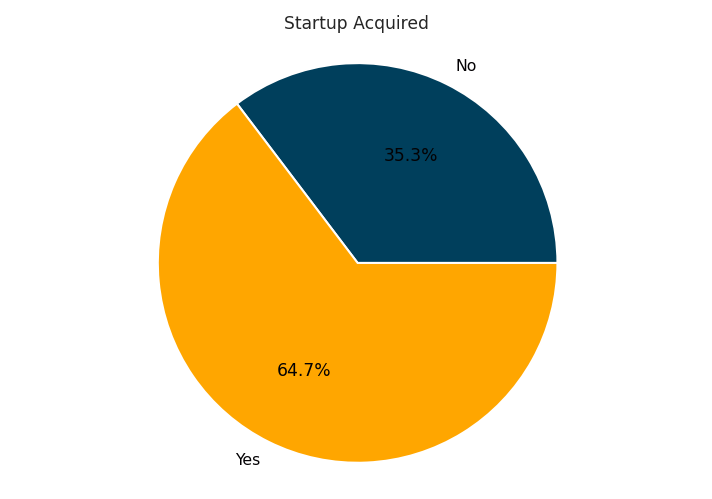

<Figure size 1029x1029 with 0 Axes>

In [ ]:
value_counts = startup["is_acquired"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, autopct="%.1f%%")
ax.axis('equal')
plt.figure(figsize=(7, 7))
ax.set_title('Startup Acquired')

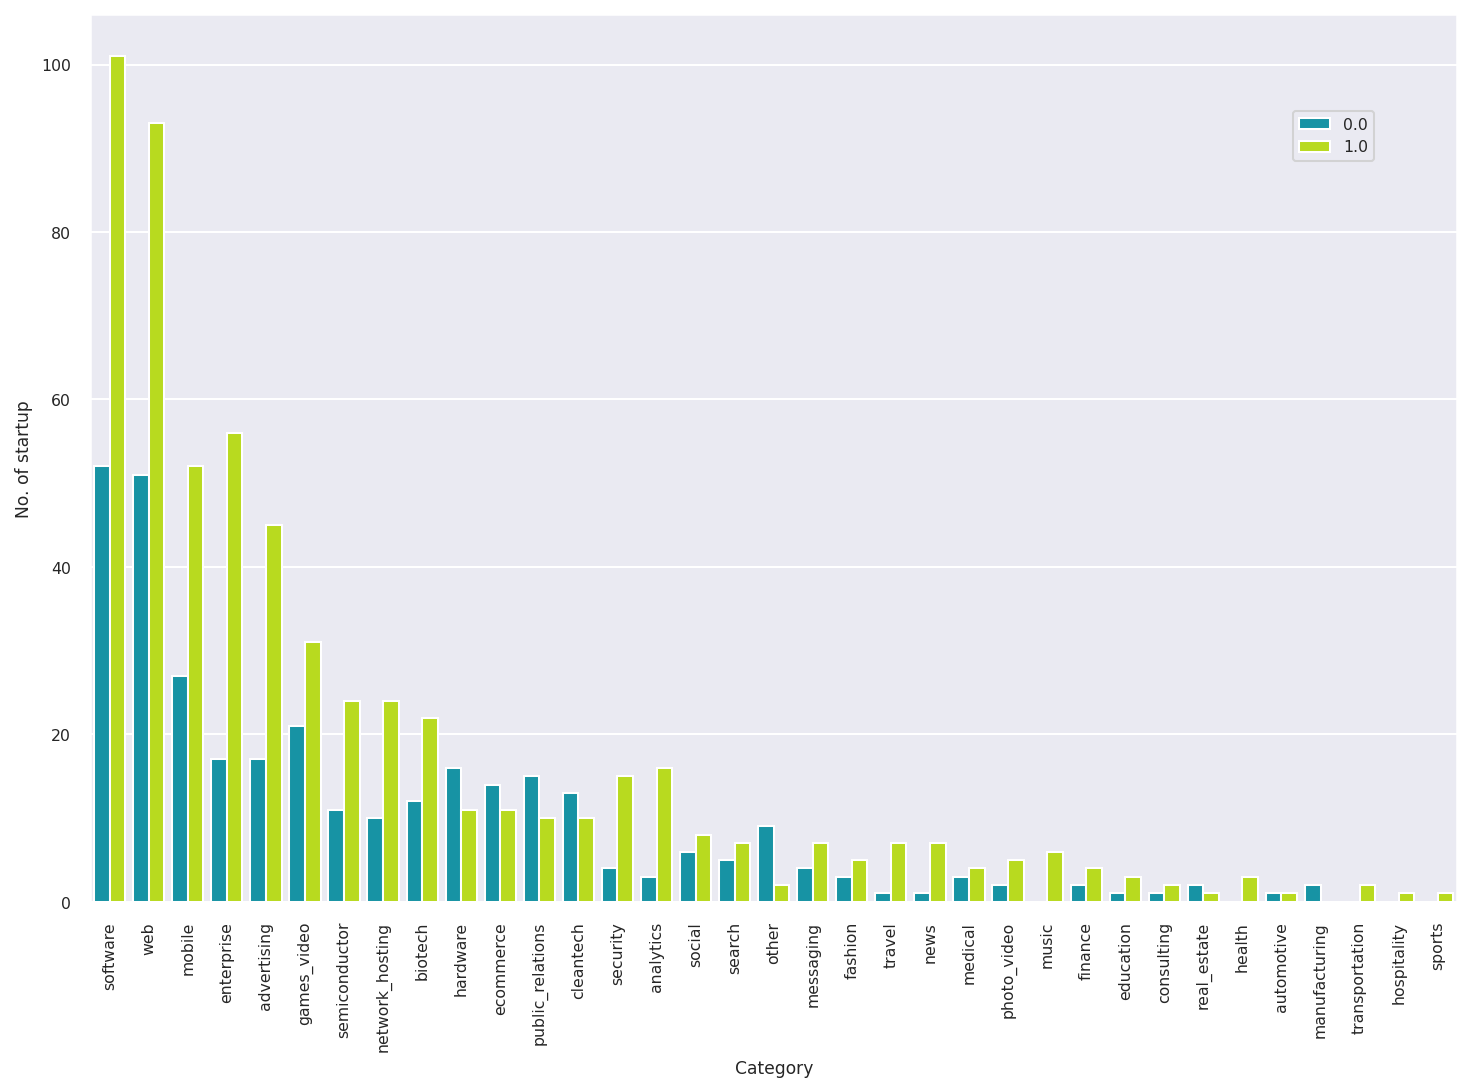

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="category_code", hue="is_acquired", data=startup, palette="nipy_spectral",
              order=startup.category_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

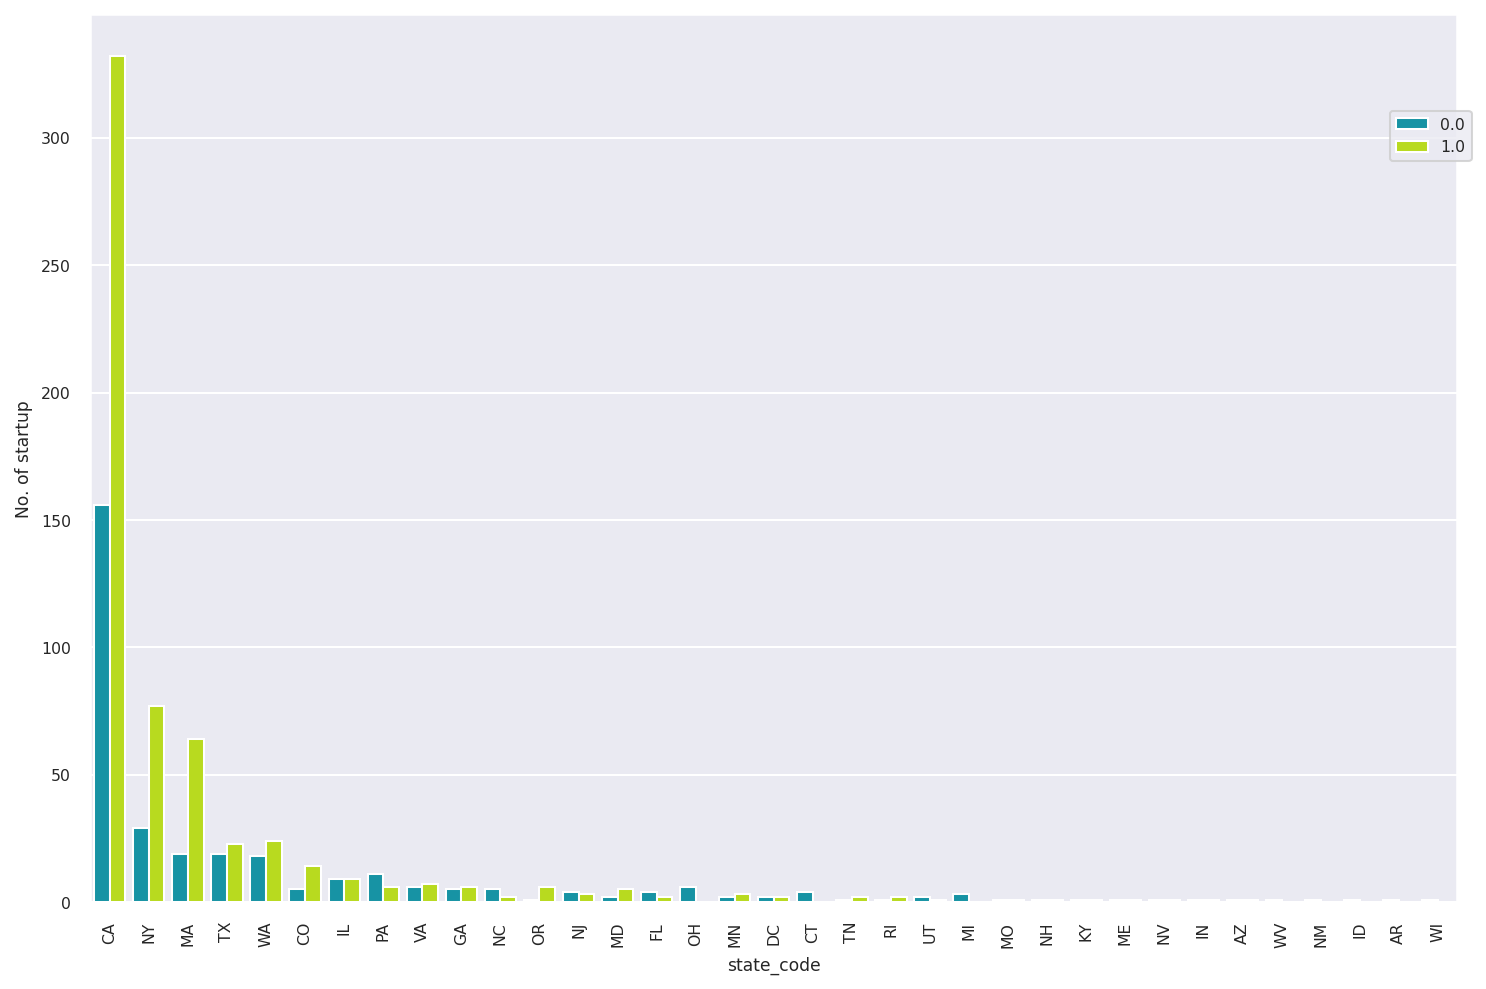

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="state_code", hue="is_acquired", data=startup, palette="nipy_spectral",
              order=startup.state_code.value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

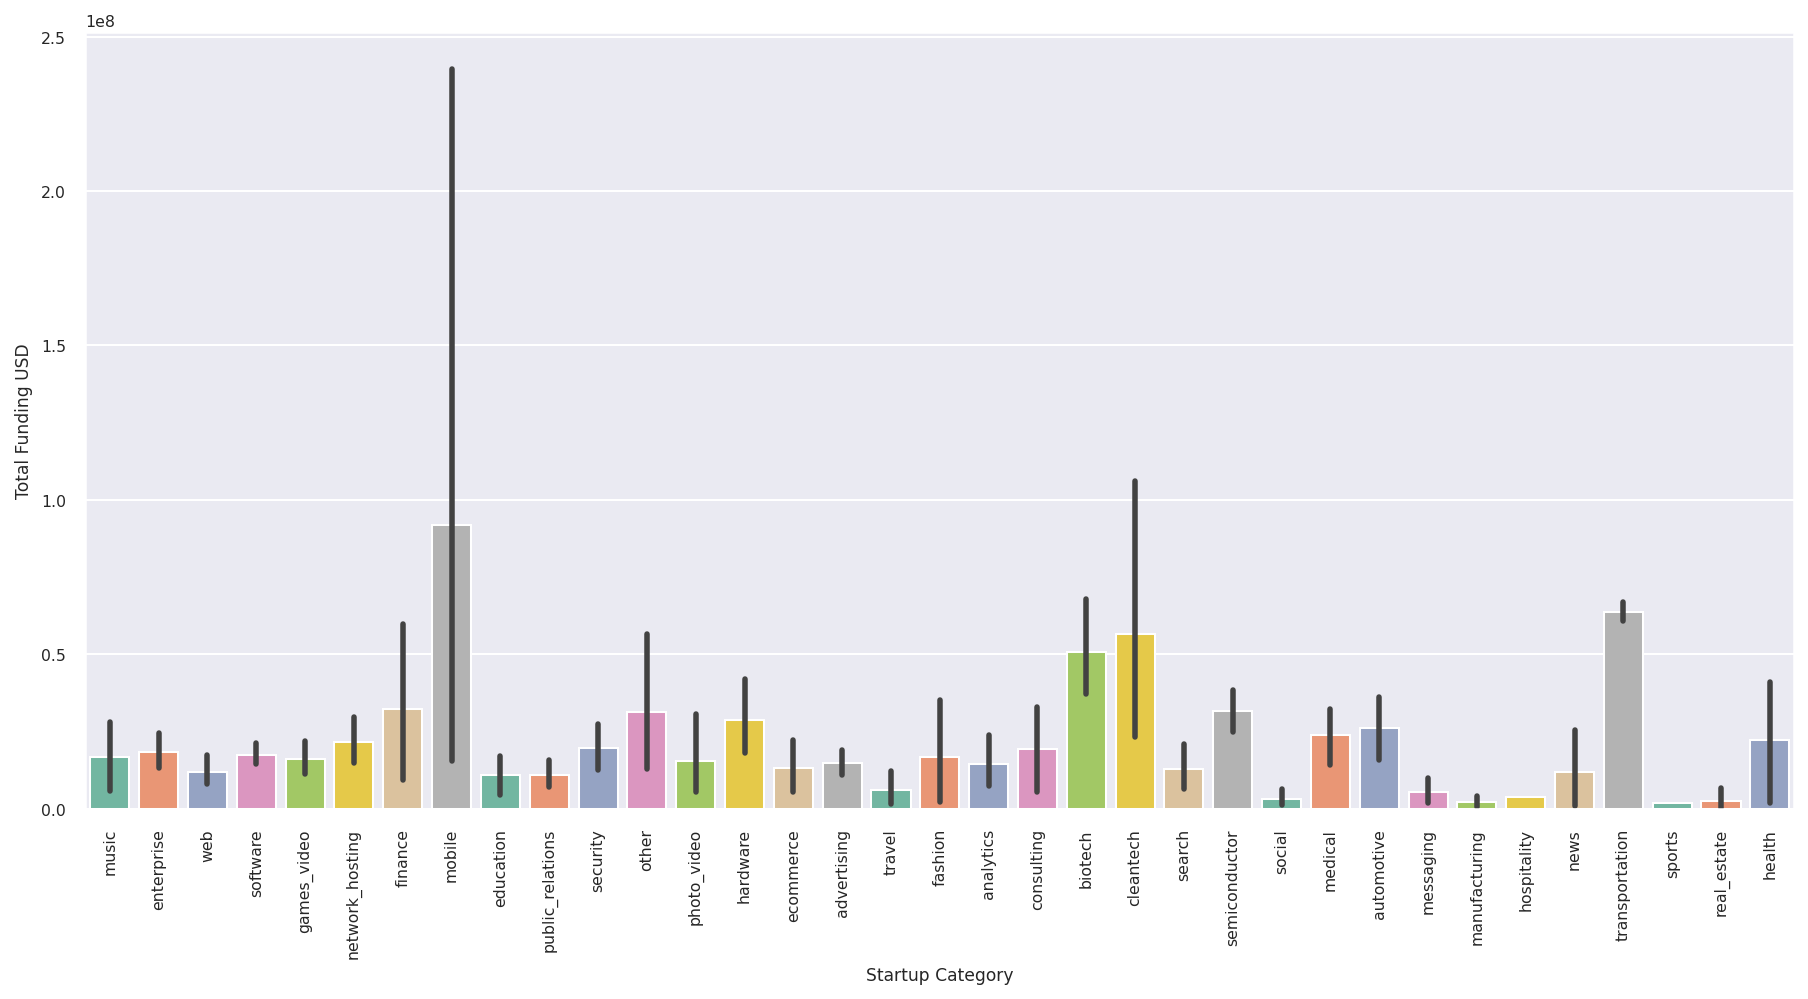

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=startup,
                palette="Set2", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Startup Category", ylabel="Total Funding USD")

# **Predictive Data Analysis**

In [17]:
startup.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city', 'name',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'is_acquired', 'last_date', 'age',
       'months_between_first_and_last_funding',
       'months_between_foundation_and_first_funding', 'founded_year'],
      dtype='object')

In [18]:
startup.shape

(923, 46)

In [19]:
startup.drop(['state_code','id','city','latitude','longitude','zip_code','category_code','object_id','name','relationships','last_date'],axis=1, inplace=True)

In [20]:
startup.shape

(923, 35)

In [21]:
#Splitting the data into Training and testing dataframe
X = startup.drop('is_acquired', axis = 1)
y = startup['is_acquired']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age,months_between_first_and_last_funding,months_between_foundation_and_first_funding,founded_year
705,0.8164,0.8164,1.77038,2.30738,1.0,2000000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,0.0,2.0,0.000000,9.790755,2010
768,0.4000,3.7589,3.00000,3.00000,4.0,122000000.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.50,1.0,5.0,40.280088,4.796813,2009
637,10.3644,10.3644,5.83840,5.83840,1.0,21000000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.00,1.0,13.0,0.000000,124.290026,1999
636,1.0877,3.6438,3.49860,3.49860,3.0,44000000.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,4.00,1.0,10.0,30.653607,13.043389,2004
299,2.3973,6.0329,4.23616,6.22028,4.0,21470000.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,3.50,1.0,9.0,43.598431,28.748024,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,9.7534,9.7534,9.75340,9.75340,1.0,50000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,0.0,16.0,0.000000,116.963387,1997
169,2.8055,2.8055,3.00270,4.64930,1.0,3000000.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.00,1.0,6.0,0.000000,33.643401,2008
663,5.4247,5.4247,4.77370,6.90410,1.0,8700000.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.00,1.0,7.0,0.000000,65.052670,2000
24,0.2521,0.3370,0.32218,1.84546,2.0,455000.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.50,1.0,3.0,1.018501,3.022649,2007


In [22]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (692, 34)
Shape of the y Train : (692,)
Shape of the X test : (231, 34)
Shape of the y test : (231,)


In [23]:
startup.dtypes

age_first_funding_year                         float64
age_last_funding_year                          float64
age_first_milestone_year                       float64
age_last_milestone_year                        float64
funding_rounds                                 float64
funding_total_usd                              float64
milestones                                     float64
is_CA                                          float64
is_NY                                          float64
is_MA                                          float64
is_TX                                          float64
is_otherstate                                  float64
is_software                                    float64
is_web                                         float64
is_mobile                                      float64
is_enterprise                                  float64
is_advertising                                 float64
is_gamesvideo                                  float64
is_ecommer

# **Modelling**

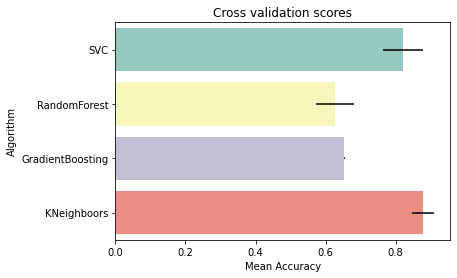

In [24]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []

classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","RandomForest","GradientBoosting","KNeighboors"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

plt.show()


# **Random Forest**

Training Accuracy : 1.0
Testing Accuracy : 0.8398268398268398


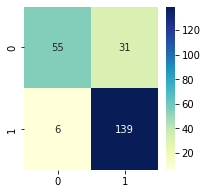

              precision    recall  f1-score   support

         0.0       0.90      0.64      0.75        86
         1.0       0.82      0.96      0.88       145

    accuracy                           0.84       231
   macro avg       0.86      0.80      0.82       231
weighted avg       0.85      0.84      0.83       231



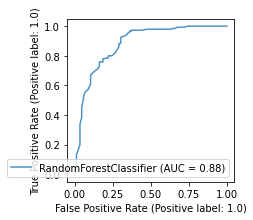

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))
y_pred_rf = rf.predict(X_test)
#eval
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu',fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


Text(0.5, 1.0, 'Features importance score')

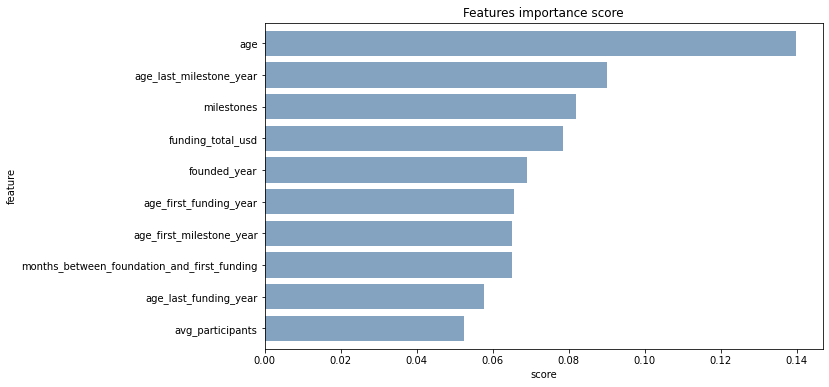

In [26]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh',width=.8, color=(0.2, 0.4, 0.6, 0.6) , figsize=(10, 6))
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Features importance score')


# **KNN**

Training Accuracy : 1.0
Testing Accuracy : 0.6406926406926406


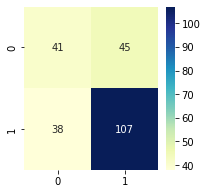

              precision    recall  f1-score   support

         0.0       0.52      0.48      0.50        86
         1.0       0.70      0.74      0.72       145

    accuracy                           0.64       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.64      0.64      0.64       231



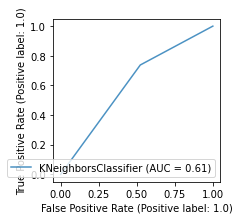

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Training Accuracy :", knn.score(X_train, y_train))
print("Testing Accuracy :", knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

#eval
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu',fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred)
print(cr)

ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


# **SVC**

Training Accuracy : 0.7427745664739884
Testing Accuracy : 0.6320346320346321


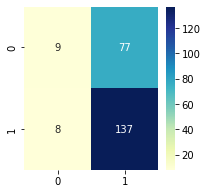

              precision    recall  f1-score   support

         0.0       0.53      0.10      0.17        86
         1.0       0.64      0.94      0.76       145

    accuracy                           0.63       231
   macro avg       0.58      0.52      0.47       231
weighted avg       0.60      0.63      0.54       231



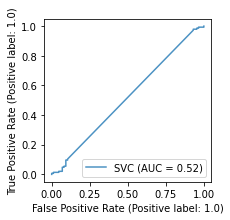

In [28]:
sv = SVC(C=0.01, probability=True, kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=50,gamma='auto',degree=2)

sv.fit(X_train,y_train)


y_pred_sv = sv.predict(X_test)

print("Training Accuracy :", sv.score(X_train, y_train))
print("Testing Accuracy :", sv.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_pred_sv)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu',fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_sv)
print(cr)

ax = plt.gca()
svc_disp = RocCurveDisplay.from_estimator(sv, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()


# **Gradient Boosting Classifier**

Training Accuracy : 1.0
Testing Accuracy : 0.8917748917748918


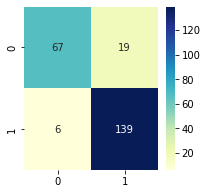

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84        86
         1.0       0.88      0.96      0.92       145

    accuracy                           0.89       231
   macro avg       0.90      0.87      0.88       231
weighted avg       0.89      0.89      0.89       231



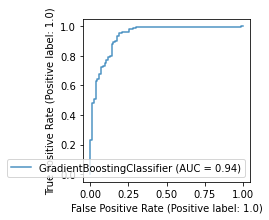

In [29]:
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train,y_train)

#predict
y_predicted_gb = gbc.predict(X_test)

print("Training Accuracy :", gbc.score(X_train, y_train))
print("Testing Accuracy :", gbc.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)

ax = plt.gca()
gc_disp = RocCurveDisplay.from_estimator(gbc, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

**Summary**

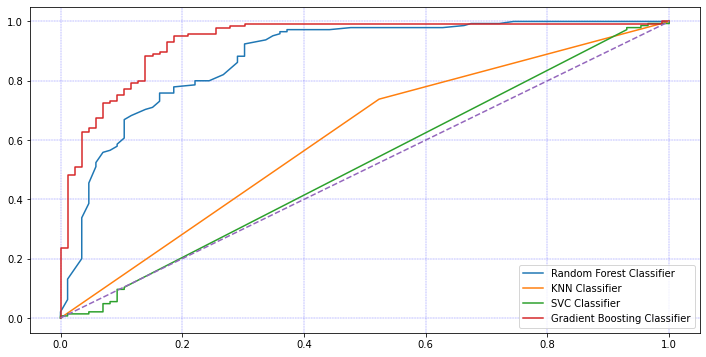

In [30]:
from sklearn import metrics
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=rf.predict_proba(X_test)[::,1]
y2_pred_prob=knn.predict_proba(X_test)[::,1]
y3_pred_prob=sv.predict_proba(X_test)[::,1]
y4_pred_prob=gbc.predict_proba(X_test)[::,1]

fpr1,tpr1,_a= metrics.roc_curve(y_test,  y1_pred_prob)
fpr2,tpr2,_b= metrics.roc_curve(y_test,  y2_pred_prob)
fpr3,tpr3,_c= metrics.roc_curve(y_test,  y3_pred_prob)
fpr4,tpr4,_c= metrics.roc_curve(y_test,  y4_pred_prob)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,label="Random Forest Classifier")
plt.plot(fpr2,tpr2,label="KNN Classifier")
plt.plot(fpr3,tpr3,label="SVC Classifier")
plt.plot(fpr4,tpr4,label="Gradient Boosting Classifier")
plt.plot([0,1], [0,1],'--')

plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

In [31]:
scores = {        
                 'GradientBoosting Classifier':  { 
                             "Training Accuracy ": gbc.score(X_train, y_train),
                             "Testing Accuracy ": gbc.score(X_test, y_test)  

                         },
                 'KNN':  { 
                             "Training Accuracy ": knn.score(X_train, y_train),
                             "Testing Accuracy ": knn.score(X_test, y_test)  

                         },
                 'SVC':  { 
                             "Training Accuracy ": sv.score(X_train, y_train),
                             "Testing Accuracy ": sv.score(X_test, y_test)  

                         },
                 'Random Forest':  { 
                             "Training Accuracy ": rf.score(X_train, y_train),
                             "Testing Accuracy ": rf.score(X_test, y_test)  

                         }
            }


In [32]:
scores

{'GradientBoosting Classifier': {'Training Accuracy ': 1.0,
  'Testing Accuracy ': 0.8917748917748918},
 'KNN': {'Training Accuracy ': 1.0, 'Testing Accuracy ': 0.6406926406926406},
 'SVC': {'Training Accuracy ': 0.7427745664739884,
  'Testing Accuracy ': 0.6320346320346321},
 'Random Forest': {'Training Accuracy ': 1.0,
  'Testing Accuracy ': 0.8398268398268398}}

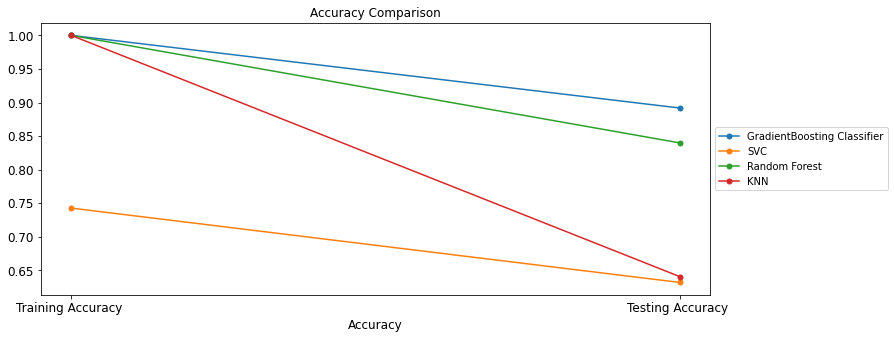

In [33]:
scores = pd.DataFrame(scores)

plt.figure(figsize=(12, 5))

plt.plot(scores['GradientBoosting Classifier'],label = "GradientBoosting Classifier",  marker="o", markersize=5)
plt.plot(scores['SVC'],label = "SVC",  marker="o", markersize=5)
plt.plot(scores['Random Forest'],label = "Random Forest",  marker="o", markersize=5)
plt.plot(scores['KNN'],label = "KNN",  marker="o", markersize=5)

plt.legend()
plt.xlabel('Accuracy', fontsize = 12)
plt.title("Accuracy Comparison", fontsize = 12)
plt.legend(prop={'size':10}, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()


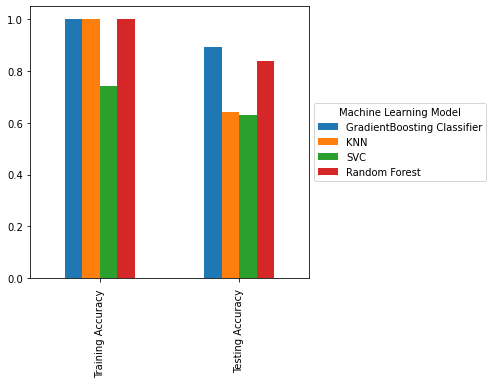

In [48]:
scores = pd.DataFrame(scores)


scores.plot(kind="bar",figsize=(5, 5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title="Machine Learning Model")
#fig.tight_layout()

# **Business Simulation**

In [35]:
pip install numerize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for numerize: filename=numerize-0.12-py3-none-any.whl size=3175 sha256=ef68c95129ea05c800d9a574940f41ca57bbfbe5bbec96a27c7642b076713b03
  Stored in directory: /root/.cache/pip/wheels/0d/ba/b3/eb42ce8e66387206bc3a9305a13b77af33b04ae6f7fde0bc14
Successfully built numerize


In [36]:
from numerize import numerize

y_predicted=pd.DataFrame(y_predicted_gb)
y_test=pd.DataFrame(y_test)

y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

X_test['funding_total_usd']=startup['funding_total_usd']
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

X_test['y_predicted_gb']=y_predicted
X_test['y_test']=y_test
X_test.head()


,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,has_roundC,has_roundD,avg_participants,is_top500,age,months_between_first_and_last_funding,months_between_foundation_and_first_funding,founded_year,y_predicted_gb,y_test
0,1.8247,1.8247,3.89590,5.90680,1.0,2300000.0,3.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,9.0,0.000000,21.881353,2005,1.0,1.0
1,0.5836,1.6521,0.63290,4.26300,2.0,540000.0,2.0,0.0,1.0,0.0,...,0.0,0.0,2.5,1.0,6.0,12.813405,6.998090,2007,1.0,1.0
2,10.4247,13.0877,8.98080,12.72330,3.0,4087500.0,3.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,14.0,31.934947,125.012834,1999,0.0,0.0
3,4.0274,4.0274,3.40272,3.96876,1.0,15000000.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,9.0,0.000000,48.296680,2003,0.0,0.0
4,0.6548,0.6548,-0.54192,1.51506,1.0,900000.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,6.0,0.000000,7.852317,2006,0.0,0.0


**Total startups failed:**

In [37]:
y_test[y_test['is_acquired']==0].count()

is_acquired    86
dtype: int64

**Predicted Startups failed:**

In [38]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted_gb']==0)]['y_predicted_gb'].count()

67

**Total Successful startup:**


In [39]:
y_test[y_test['is_acquired']==1].count()

is_acquired    145
dtype: int64

**Predict True Successful Startup:**

In [40]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted_gb']==1)]['y_predicted_gb'].count()

139

**Total Investment without Gradient Boosting Model:**

In [41]:
a = numerize.numerize(X_test['funding_total_usd'].sum())
print("$", a, "was invested without using Gradient Boosting Model")


$ 4.05B was invested without using Gradient Boosting Model


**Total Investment with Gradient Boosting Model:**

In [42]:
a = numerize.numerize(X_test[(X_test['y_predicted_gb']==1)]['funding_total_usd'].sum())
print("$", a, "is the predicted investment amount using Gradient Boosting Model investors should invest")

$ 3.27B is the predicted investment amount using Gradient Boosting Model investors should invest


**Potential Loss without GB Model:**

In [43]:
loss = numerize.numerize(X_test[(X_test['y_test']==0)]['funding_total_usd'].sum())
print("$", loss, "is the actual loss of investors becuase of failed startups")

$ 1.09B is the actual loss of investors becuase of failed startups


**Potential Loss With GB Model:**

In [44]:
lossgb = numerize.numerize(X_test[(X_test['y_test']==0)&(X_test['y_predicted_gb']==1)]['funding_total_usd'].sum())
print("$", lossgb, "is the predicted loss of investors becuase of failed startups using Gradient Boosting Model")

$ 424.5M is the predicted loss of investors becuase of failed startups using Gradient Boosting Model


In [45]:
a = X_test[(X_test['y_test']==0)]['funding_total_usd'].sum()
b = X_test[(X_test['y_test']==0)&(X_test['y_predicted_gb']==1)]['funding_total_usd'].sum()
print("Almost", int((a-b)/a*100), "% loss could be saved using Gradient Boosting Model")

Almost 61 % loss could be saved using Gradient Boosting Model


**Saving Fund Investment with GB Model:**

In [46]:
a = numerize.numerize(X_test[(X_test['y_test']==0)&(X_test['y_predicted_gb']==0)]['funding_total_usd'].sum())
print("$", a, "is the amount could be saved using Gradient Boosting Model")

$ 670.4M is the amount could be saved using Gradient Boosting Model
